In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [132]:
df = pd.read_csv('train.csv')

df

,id,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,...,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61,Col 62,Col 63,Col 64,y
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,...,-0.022038,-0.031125,-0.000922,0.033494,0.000852,0.031150,-0.028191,-0.017658,-0.027794,151
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,...,-0.011564,0.012973,0.023783,-0.023815,-0.094506,-0.140378,0.025298,0.053034,0.104013,75
2,2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,...,-0.022063,-0.018016,0.004913,0.032956,0.018281,0.032795,-0.027332,-0.017236,-0.022304,141
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,...,-0.009984,-0.003373,-0.019109,0.008159,0.001898,0.021514,-0.012045,-0.024872,-0.025042,206
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,...,-0.024091,-0.026846,-0.029687,0.030984,0.014489,0.005386,-0.025575,-0.016180,0.008735,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,-0.027310,0.050680,0.060618,0.049415,0.085116,0.086368,-0.002903,0.034309,0.037814,...,0.023104,0.056056,0.075937,0.029510,0.017894,0.010752,-0.001955,0.014242,0.015606,186
156,156,-0.016412,-0.044642,-0.010517,0.001215,-0.037344,-0.035760,0.011824,-0.039493,-0.021394,...,-0.001265,0.000986,0.012134,0.022610,0.014659,0.004828,-0.010755,0.008008,-0.006328,25
157,157,-0.001882,0.050680,-0.033151,-0.018294,0.031454,0.042840,-0.013948,0.019917,0.010226,...,-0.010049,-0.006214,0.011544,0.026163,0.017152,0.005169,-0.023226,-0.007626,-0.015175,84
158,158,-0.012780,-0.044642,-0.065486,-0.069938,0.001183,0.016849,-0.002903,-0.007020,-0.030751,...,-0.025315,-0.027269,-0.032436,0.031763,0.022391,0.017242,-0.022989,-0.011548,0.010113,96


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      160 non-null    int64  
 1   Col 1   160 non-null    float64
 2   Col 2   160 non-null    float64
 3   Col 3   160 non-null    float64
 4   Col 4   160 non-null    float64
 5   Col 5   160 non-null    float64
 6   Col 6   160 non-null    float64
 7   Col 7   160 non-null    float64
 8   Col 8   160 non-null    float64
 9   Col 9   160 non-null    float64
 10  Col 10  160 non-null    float64
 11  Col 11  160 non-null    float64
 12  Col 12  160 non-null    float64
 13  Col 13  160 non-null    float64
 14  Col 14  160 non-null    float64
 15  Col 15  160 non-null    float64
 16  Col 16  160 non-null    float64
 17  Col 17  160 non-null    float64
 18  Col 18  160 non-null    float64
 19  Col 19  160 non-null    float64
 20  Col 20  160 non-null    float64
 21  Col 21  160 non-null    float64
 22  Co

In [134]:
df.isnull().sum()

id        0
Col 1     0
Col 2     0
Col 3     0
Col 4     0
         ..
Col 61    0
Col 62    0
Col 63    0
Col 64    0
y         0
Length: 66, dtype: int64

In [135]:
df['y']

0      151
1       75
2      141
3      206
4      135
      ... 
155    186
156     25
157     84
158     96
159    195
Name: y, Length: 160, dtype: int64

(array([15., 26., 29., 24., 21., 14.,  6., 12.,  9.,  4.]),
 array([ 25. ,  56.6,  88.2, 119.8, 151.4, 183. , 214.6, 246.2, 277.8,
        309.4, 341. ]),
 <BarContainer object of 10 artists>)

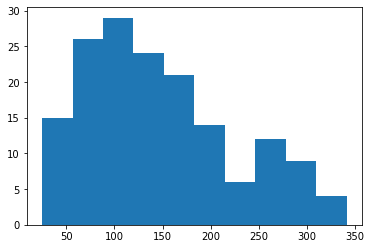

In [136]:
plt.hist(df['y'])

In [137]:
df.describe(include='all')

,id,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,...,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61,Col 62,Col 63,Col 64,y
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,79.500000,-0.008875,-0.002343,-0.001120,-0.004401,-0.006032,-0.004778,0.002827,-0.005934,-0.006234,...,-0.000659,-0.005031,-0.000871,-0.001619,0.002133,-0.002643,-0.005465,0.001668,-0.001809,147.843750
std,46.332134,0.048101,0.047507,0.046042,0.045894,0.043050,0.045374,0.048762,0.047204,0.044045,...,0.055793,0.043475,0.049456,0.047331,0.045093,0.056129,0.039382,0.053606,0.047778,76.364695
min,0.000000,-0.107226,-0.044642,-0.083808,-0.108957,-0.126781,-0.106845,-0.102307,-0.076395,-0.126097,...,-0.076433,-0.155145,-0.151734,-0.228580,-0.143972,-0.223255,-0.160745,-0.128919,-0.092165,25.000000
25%,39.750000,-0.046381,-0.044642,-0.035307,-0.036656,-0.037344,-0.034273,-0.032356,-0.039493,-0.034524,...,-0.023703,-0.022007,-0.020446,-0.021084,-0.018638,-0.017585,-0.026875,-0.019626,-0.023964,87.750000
50%,79.500000,-0.001882,-0.044642,-0.006206,-0.012556,-0.005009,-0.009925,-0.002903,-0.002592,-0.010412,...,-0.014868,-0.009495,-0.010498,0.014418,0.009642,0.009252,-0.014899,-0.015336,-0.015265,134.500000
75%,119.250000,0.030811,0.050680,0.028284,0.021872,0.020446,0.021703,0.037595,0.025822,0.026221,...,0.003447,0.013173,0.009096,0.031522,0.022619,0.022176,0.014464,0.018200,0.011668,195.500000
max,159.000000,0.085299,0.050680,0.128521,0.125158,0.152538,0.198788,0.181179,0.185234,0.133599,...,0.555129,0.113164,0.299032,0.080445,0.163067,0.209905,0.157844,0.318104,0.338184,341.000000


In [138]:
X = df.drop(columns=['y'])
y = df['y']

In [139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_test.shape)

(128, 2)
(32, 2)


In [141]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [142]:
mse = mean_squared_error(y_test, y_pred)

np.round(mse, 2)

5107.34

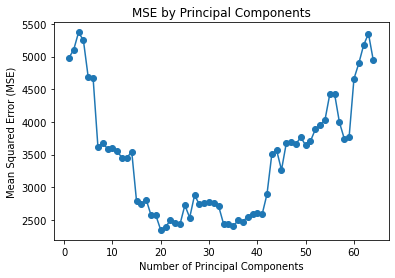

In [143]:
# Find best principal components by mse score

# Intialize mse
mse = []
num_comps = []

for comp in range(1, len(X.columns)):
    pca = PCA(n_components=comp)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=23)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    num_comps.append(comp)

plt.scatter(num_comps, mse)
plt.plot(num_comps, mse)
plt.title("MSE by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()


In [144]:
best_mse = min(mse)
best_num_comp = np.argmin(mse)+1

print(f'Best number of principal components: {best_num_comp}\nBest MSE: {best_mse}')

Best number of principal components: 20
Best MSE: 2345.448194670188


## Standardizing variables

In [148]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=(['id', 'y']))
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [149]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mse

5702.131169565064

mse of 5702 is baseline

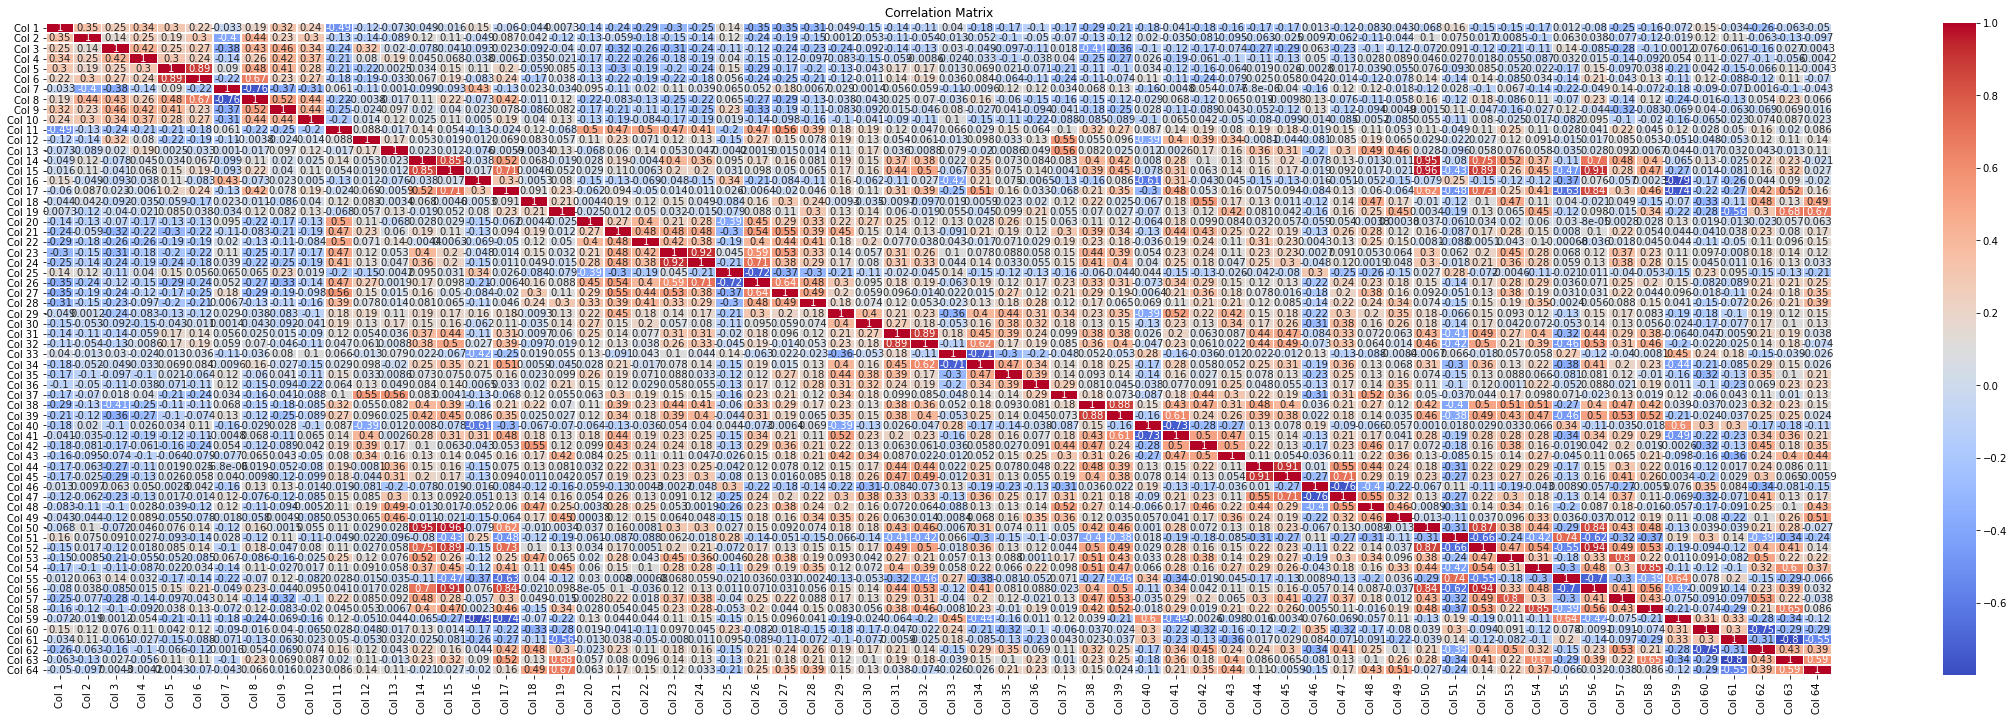

In [154]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(40, 12))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Random Forest

In [155]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [161]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Create a KFold object for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=23)

# Create a RandomForestRegressor instance
rf = RandomForestRegressor()

# Create a pipeline
pipeline = Pipeline([
    ('rf', rf)
])

# Create GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=k_fold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean squared error
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
Mean Squared Error: 2937.643174612066


In [165]:
# Final fit
model = RandomForestRegressor(
    n_estimators=best_params['rf__n_estimators'],  # Replace with your best hyperparameters
    max_depth=best_params['rf__max_depth'],
    min_samples_split=best_params['rf__min_samples_split'],
    min_samples_leaf=best_params['rf__min_samples_leaf']
)

model.fit(X_train, y_train)  # Replace with your training data

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=50)

In [166]:
y_pred = model.predict(X_test)  # Replace with your testing data
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 2961.082015350347


# Kaggle Submission

In [164]:
# Load test dataset

x_test_kaggle = pd.read_csv('x_test.csv')

In [168]:
# drop ID

x_test_kaggle_drop = x_test_kaggle.drop('id', axis=1)

# Get predictions 

y_pred_kaggle = model.predict(x_test_kaggle_drop)

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [169]:
kaggle_df = pd.read_csv('sample_submission.csv')
kaggle_df['y'] = y_pred_kaggle


# kaggle_df.to_csv('submission.csv', index=False)
kaggle_df = kaggle_df[['id', 'y']]
kaggle_df.to_csv('brian_submission_rf.csv', index=False)